Bienvenido al Notebook del Capítulo 1: Introducción a la IA aplicada a Finanzas


/tmp/ipython-input-3-288378379.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2022-01-01", end="2025-06-17")
[*********************100%***********************]  1 of 1 completed

Descargando datos para AAPL...


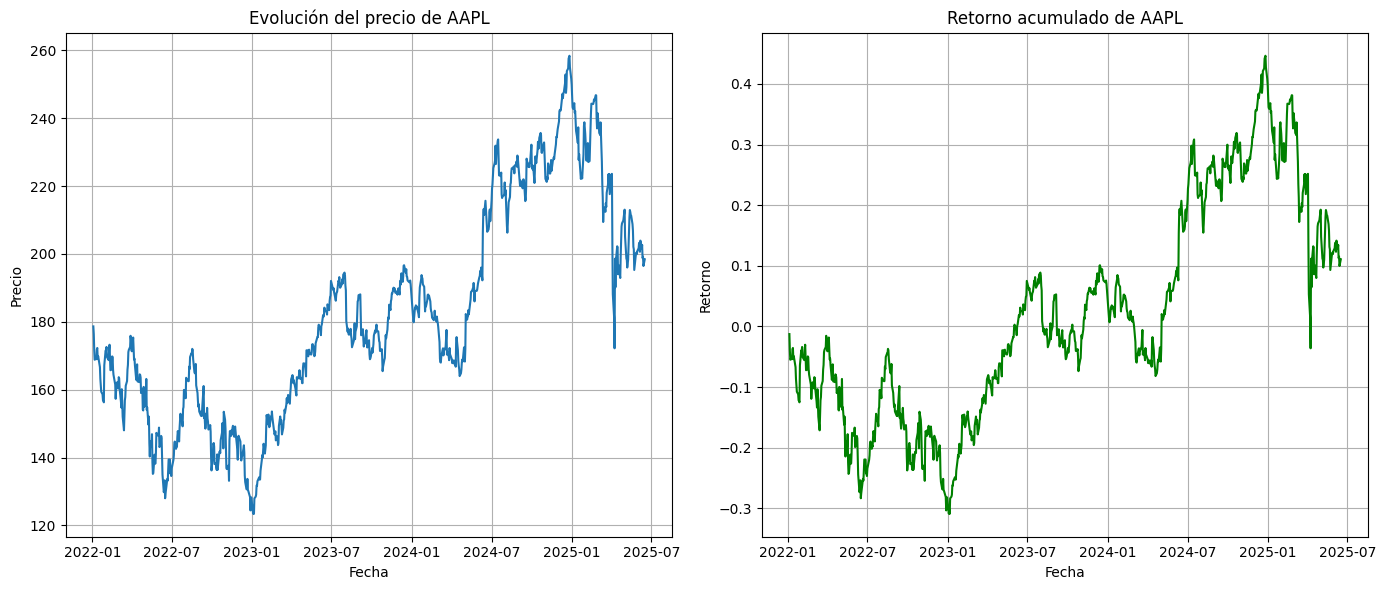


Interpretación (2025-06-18):
El retorno acumulado de AAPL desde 2022 muestra la evolución del valor para un inversor que hubiera mantenido su posición. Puede probar con otros activos cambiando el ticker arriba.

✨ Ejercicio sugerido:
1. Cambie el ticker (por ejemplo, 'MSFT', 'GOOGL', 'TSLA', o 'USDCOP=X' para el dólar en Colombia).
2. Compare la evolución de diferentes activos en periodos similares.


In [ ]:
# Capítulo 1 - Notebook: Introducción a la IA en Finanzas

# ᵀᴹᴸ Bienvenida
print("Bienvenido al Notebook del Capítulo 1: Introducción a la IA aplicada a Finanzas")

# ᵀᴾᴼ Instalación de librerías necesarias (si no están instaladas)
!pip install yfinance --quiet

# ᵀᴾᴼ Importación de librerías
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# ᵀᴾᴼ Definición del ticker (puede cambiarlo por otro)
ticker = "AAPL"  # Ejemplo: Apple Inc.

# ᵀᴾᴼ Descarga de datos históricos
print(f"Descargando datos para {ticker}...")
data = yf.download(ticker, start="2022-01-01", end="2025-06-17")

# Verificación de columnas disponibles para evitar errores
if 'Adj Close' in data.columns:
    data = data[['Adj Close']].rename(columns={'Adj Close': 'Precio Ajustado'})
elif 'Close' in data.columns:
    data = data[['Close']].rename(columns={'Close': 'Precio Ajustado'})
else:
    raise KeyError("No se encontró ni 'Adj Close' ni 'Close' en los datos descargados.")

# ᵀᴾᴼ Cálculo del retorno acumulado
data['Retorno'] = data['Precio Ajustado'].pct_change()
data['Retorno Acumulado'] = (1 + data['Retorno']).cumprod() - 1

# ᵀᴾᴼ Visualización del precio y del retorno acumulado
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(data.index, data['Precio Ajustado'], label='Precio Ajustado')
plt.title(f"Evolución del precio de {ticker}")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(data.index, data['Retorno Acumulado'], label='Retorno Acumulado', color='green')
plt.title(f"Retorno acumulado de {ticker}")
plt.xlabel("Fecha")
plt.ylabel("Retorno")
plt.grid(True)

plt.tight_layout()
plt.show()

# ᵀᴾᴼ Comentario interpretativo
from datetime import date
print(f"\nInterpretación ({date.today()}):")
print(f"El retorno acumulado de {ticker} desde 2022 muestra la evolución del valor para un inversor que hubiera mantenido su posición. Puede probar con otros activos cambiando el ticker arriba.")

# ᵀᴾᴼ Ejercicio sugerido
print("\n✨ Ejercicio sugerido:")
print("1. Cambie el ticker (por ejemplo, 'MSFT', 'GOOGL', 'TSLA', o 'USDCOP=X' para el dólar en Colombia).")
print("2. Compare la evolución de diferentes activos en periodos similares.")
